In [17]:
from gridworld_env import *
import matplotlib.pyplot as plt

In [18]:
env = gridworld(10)
env.set_huddle(20)

In [19]:
discount =.99
num_episode = 1000
alpha = 0.5

Q = {k:np.array([0 for v in env.avail_act[k]], dtype=float) for k in env.avail_act} # initialize Q value set by 0
Q[env.goal] = [0] # for except None value error
reward_buffer = []

for episode in range(num_episode):
    if episode % (num_episode/100) == 0:
        print(f'\rprogress {episode/num_episode*100:4.1f}%...', end = '')
    state = env.reset()
    done = False
    reward_sum = 0
    while not done:
        action = np.argmax(Q[state] + np.random.random(Q[state].size)/(episode+1)) # make noise for greedy action
        new_state, reward, done, _ = env.step(action)
        Q[state][action] = (1-alpha) * Q[state][action] + alpha * (reward + discount * np.max(Q[new_state]) - Q[state][action])
        reward_sum += reward
        state = new_state
    reward_buffer.append(reward_sum)
print(f'\rprogress 100%')

progress 100%


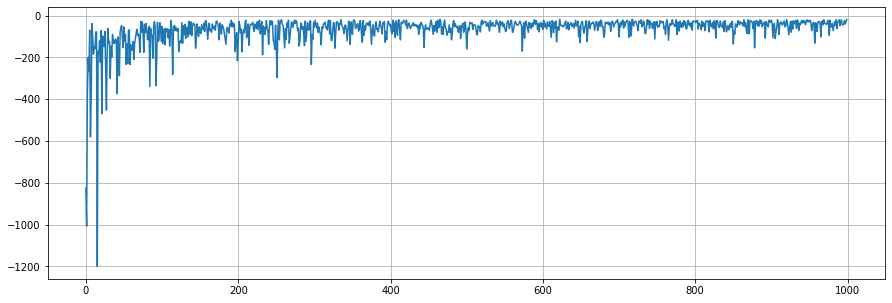

average reward is -65.881


In [20]:
plt.figure(figsize=(15,5))
plt.plot(reward_buffer)
plt.grid(True)
plt.show()
print(f'average reward is {np.mean(reward_buffer)}')

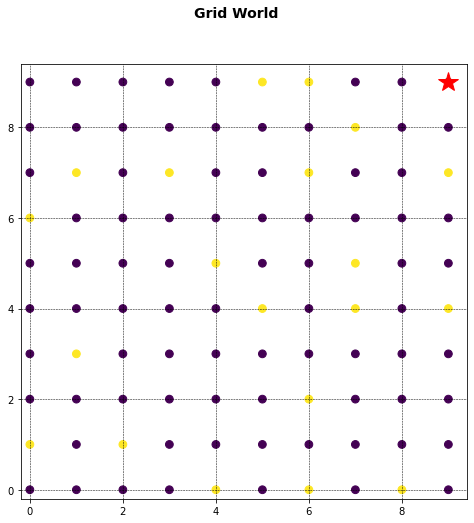

In [21]:
state = env.reset()
done = False
while not done:
    action = np.argmax(Q[state])
    state, reward, done, _ = env.step(action)
    env.render()

# Optimal State Function
# $V_*(s)=\displaystyle\max_\pi[V_\pi(s)]=\displaystyle\max_a[Q_\pi(s,A)]$

In [22]:
# P = np.zeros((len(env.state), len(env.state)))
# for state in Q:
#     index = state[0]*env.size + state[1]
#     if state == env.goal:
#         continue
#     for i, action in enumerate(Q[state]):
#         next_index = env.avail_act[state][i][0]*env.size+env.avail_act[state][i][1]
#         P[index, next_index] = Q[state][i]
# R = np.sum(P*-1, axis=1)
# I = np.eye(env.size**2)
# VV = np.linalg.inv(I-discount*P)@R
# V = Q.copy()
# for i, state in enumerate(V):
#     V[state] = VV[i]

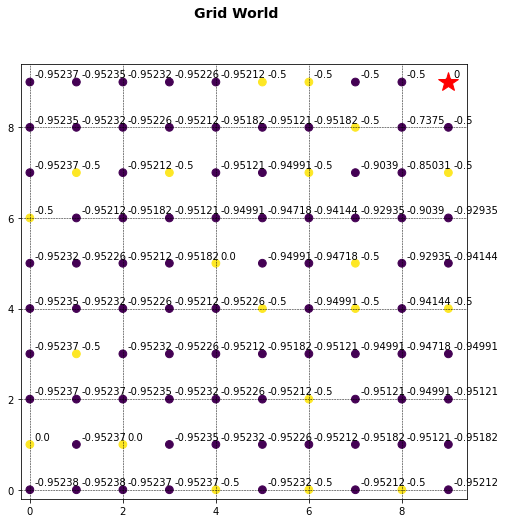

In [39]:
# 훈련 종료 후 agent의 정책에 따른 각 state의 상태가치함수 추정치를 출력하는 부분
# agent는 Q값을 학습했고 그 값이 agent.Q에 저장되어있을 것임. 이를 이용해서 agentV를 계산할 필요가 있다.
agentV = {}
for state in env.state:
    agentV[state] = max(Q[state]) # optimal value function
env.render(agentV)

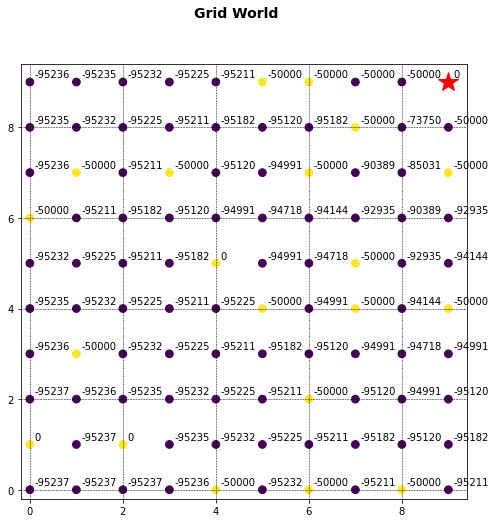

In [40]:
env.render({k:int(v*1e5) for k,v in agentV.items()})